# 🚢 Titanic Survival Prediction

End-to-end machine learning pipeline:
- Data cleaning
- Feature engineering
- Encoding
- Modeling
- Evaluation


In [167]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb

from scipy.stats import skew

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve



In [168]:
#Loading the dataset
df = pd.read_csv("C:/Users/user/Documents/Tech/TS_ACADEMY/datasets/Titanic-Dataset.csv")

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [170]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [171]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [172]:
# Eye-balling the dataset to identify possible cleaning needed
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


***INITIAL CLEANING***

In [173]:
def wrangle1(df):
    print('check for duplicates')
    print(df.duplicated().sum())
    
    '''print('Checking for the unique values in each column')
    for col in df.columns:
        print(f"Column: {col}")
        print(df[col].unique())
        print("-" * 40)'''
        
    print('Show number of unique values per column')
    print(df.nunique())
    
    print('Columns to drop; PassengerID, Name, Ticket, Cabin')
    df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
    print('dataset info')
    print(df.info())

In [174]:
wrangle1(df)

check for duplicates
0
Show number of unique values per column
PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64
Columns to drop; PassengerID, Name, Ticket, Cabin
dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
None


In [175]:
import math
import matplotlib.pyplot as plt
import seaborn as sb

def plot_eda(
    df,
    imbalance_threshold=70,
    imbalance_n_cols=1,
    imbalance_figsize=(4, 15),
    max_unique_categories=20
):
    """
    Function to perform basic EDA plots on the given DataFrame.
    """

    # --------------------------------------------------
    # 🔧 INNER FUNCTION: Class Imbalance Plot
    # --------------------------------------------------
    def plot_class_imbalance(
        df,
        columns,
        imbalance_threshold=70,
        n_cols=1,
        figsize=(4, 15)
    ):
        n_rows = math.ceil(len(columns) / n_cols)
        fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

        if n_rows == 1 and n_cols == 1:
            axes = [axes]
        else:
            axes = axes.flatten()

        for ax, col in zip(axes, columns):
            value_counts = df[col].value_counts(normalize=True) * 100

            sb.barplot(
                x=value_counts.index.astype(str),
                y=value_counts.values,
                ax=ax
            )

            max_pct = value_counts.max()
            title = f"{col} (Max: {max_pct:.1f}%)"

            if max_pct >= imbalance_threshold:
                title += " ⚠️ Imbalanced"

            ax.set_title(title)
            ax.set_ylabel("Percentage")
            ax.set_xlabel(col)
            ax.tick_params(axis="x", rotation=45)

        # Hide unused subplots
        for i in range(len(columns), len(axes)):
            axes[i].axis("off")

        plt.tight_layout()
        plt.show()

    # -----------------------------
    # 0. Basic Info
    # -----------------------------
    print(df.info())
    sb.set(style="whitegrid")

    # -----------------------------
    # 1. Pairplot (Numerical)
    # -----------------------------
    try:
        print("Generating Pairplot for numerical variables...")
        sb.pairplot(df.select_dtypes(include=["int64", "float64"]),
                    diag_kind="kde",
                    corner=True)
        plt.suptitle("Pairplot of Numerical Variables", y=1.02)
        plt.show()
    except Exception as e:
        print(f"Pairplot Error: {e}")

    # -----------------------------
    # 2. Numerical Distributions
    # -----------------------------
    numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

    for col in numerical_columns:
        try:
            plt.figure()
            sb.histplot(df[col], kde=True, bins=20)
            plt.title(f"Distribution of {col}")
            plt.xlabel(col)
            plt.ylabel("Frequency")
            plt.show()
        except Exception as e:
            print(f"Distribution Plot Error for {col}: {e}")

    # -----------------------------
    # 3. Boxplots (Outliers)
    # -----------------------------
    for col in numerical_columns:
        try:
            plt.figure(figsize=(8, 6))
            sb.boxplot(x=df[col])
            plt.title(f"Boxplot for {col}")
            plt.show()
        except Exception as e:
            print(f"Boxplot Error for {col}: {e}")

    # -----------------------------
    # 4. Correlation Heatmap
    # -----------------------------
    try:
        corr = df.corr(numeric_only=True)
        plt.figure(figsize=(10, 8))
        sb.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
        plt.title("Correlation Heatmap")
        plt.show()
    except Exception as e:
        print(f"Correlation Heatmap Error: {e}")

    # -----------------------------
    # 5. Class Imbalance Analysis
    # -----------------------------
    imbalance_columns = [
        col for col in df.columns
        if df[col].nunique() <= max_unique_categories
    ]

    if imbalance_columns:
        print("Generating Class Imbalance Plots...")
        plot_class_imbalance(
            df=df,
            columns=imbalance_columns,
            imbalance_threshold=imbalance_threshold,
            n_cols=imbalance_n_cols,
            figsize=imbalance_figsize
        )
    else:
        print("No suitable categorical columns for imbalance analysis.")

    print("EDA Complete ✅")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
None
Generating Pairplot for numerical variables...


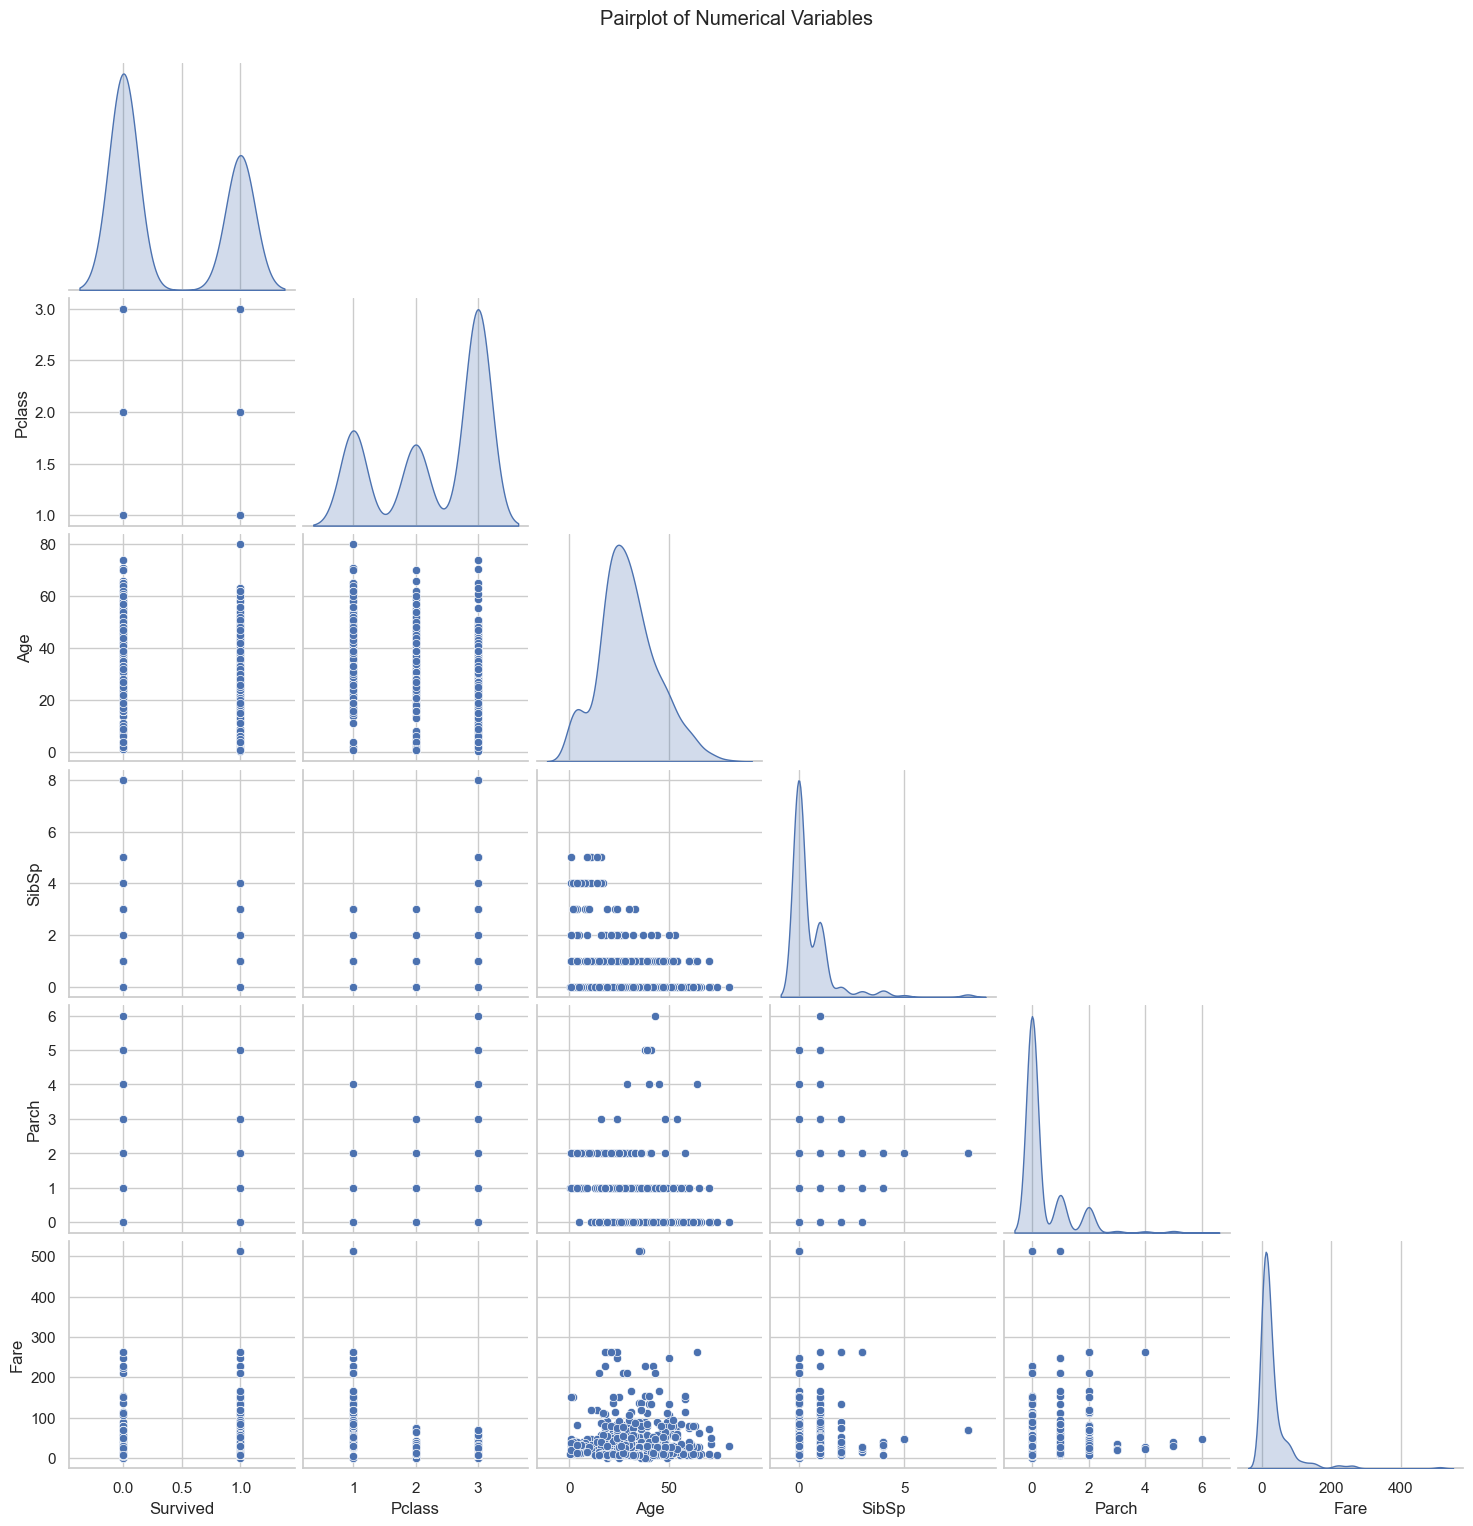

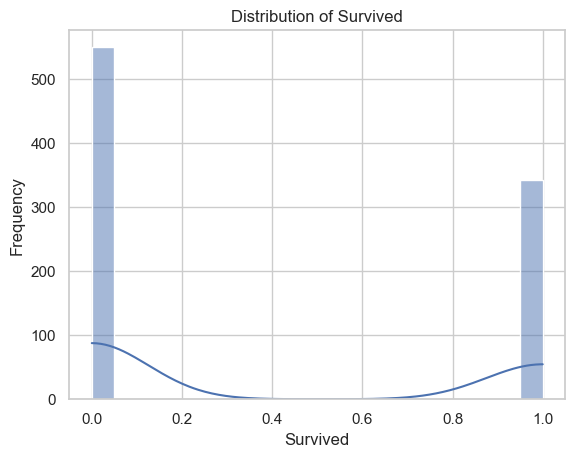

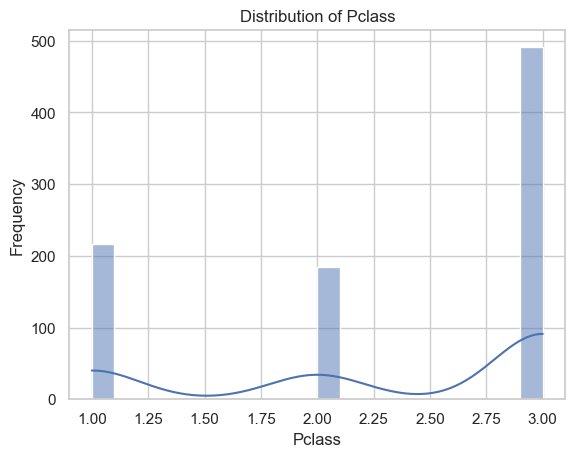

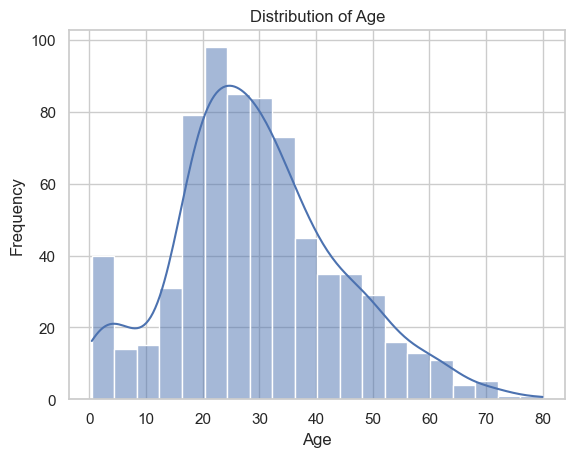

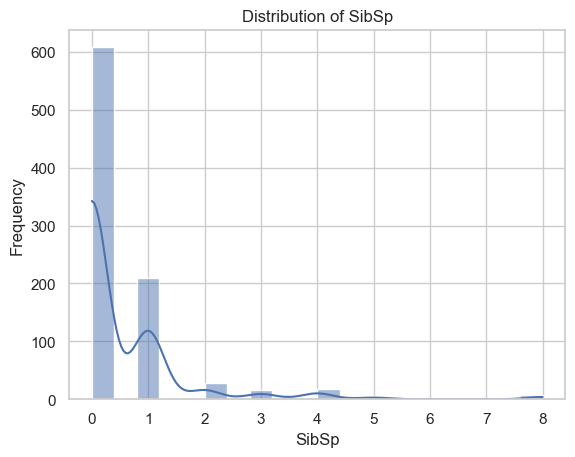

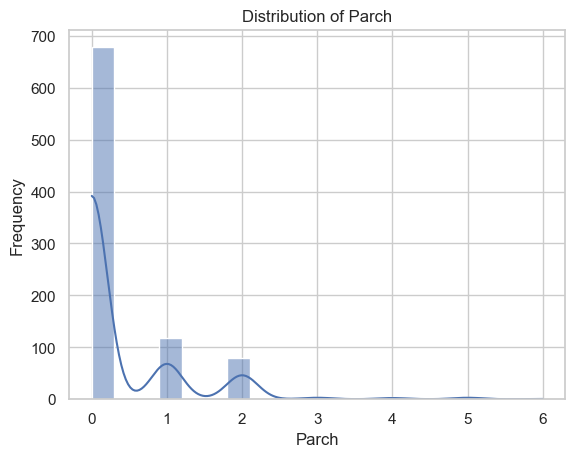

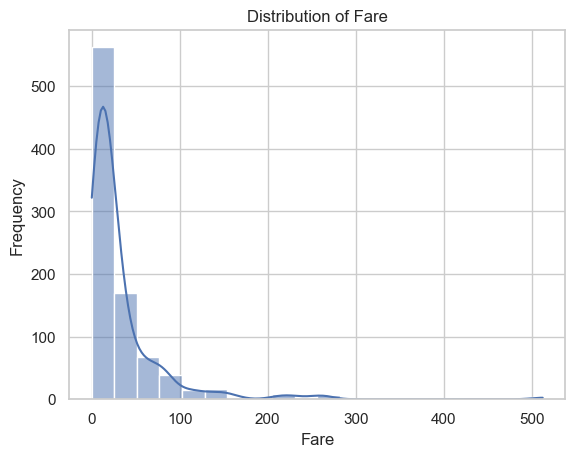

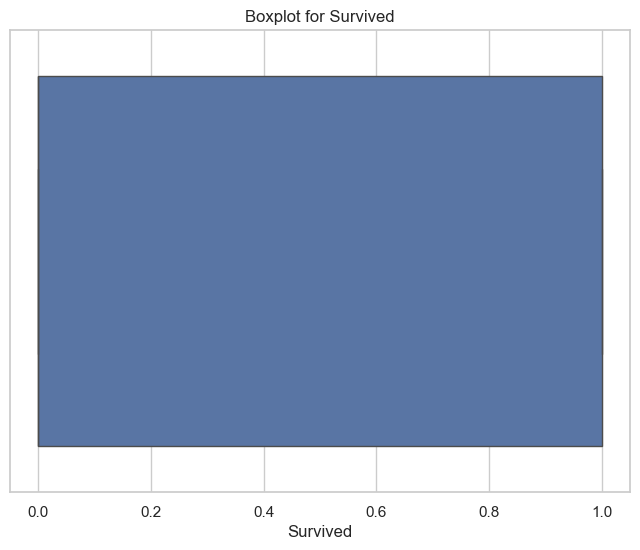

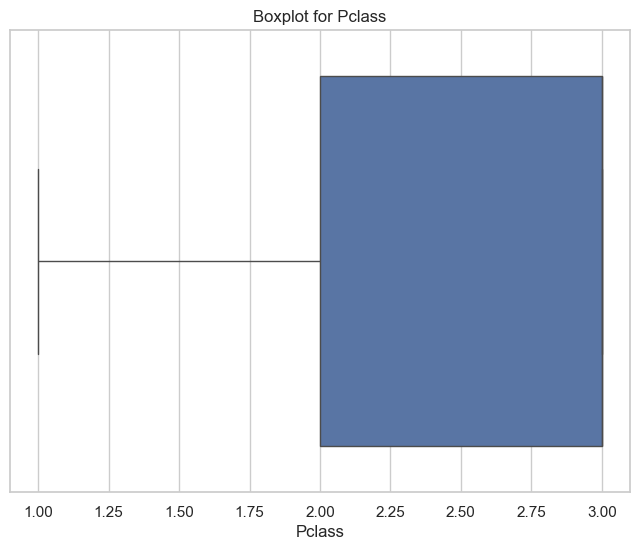

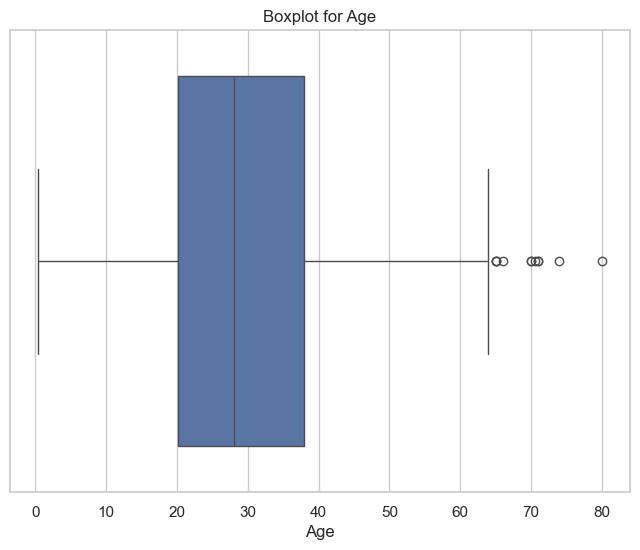

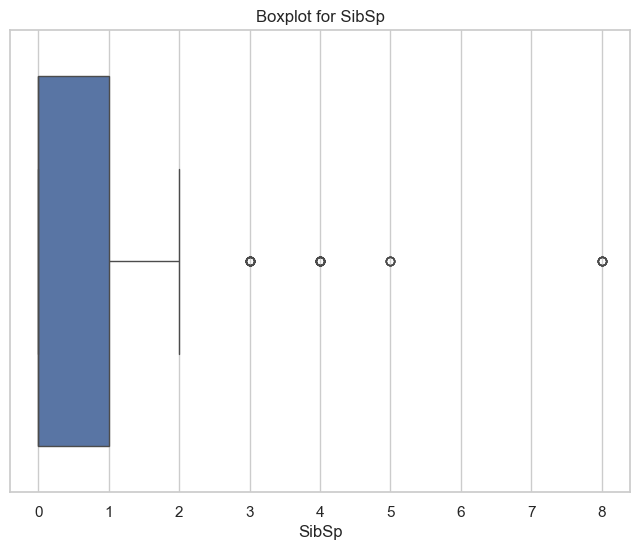

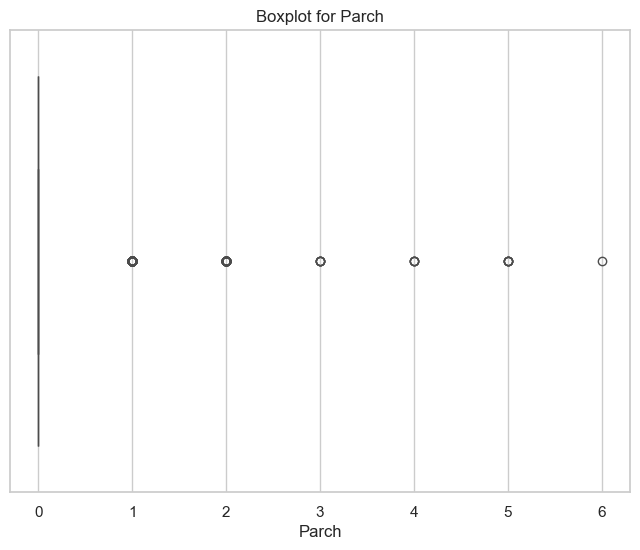

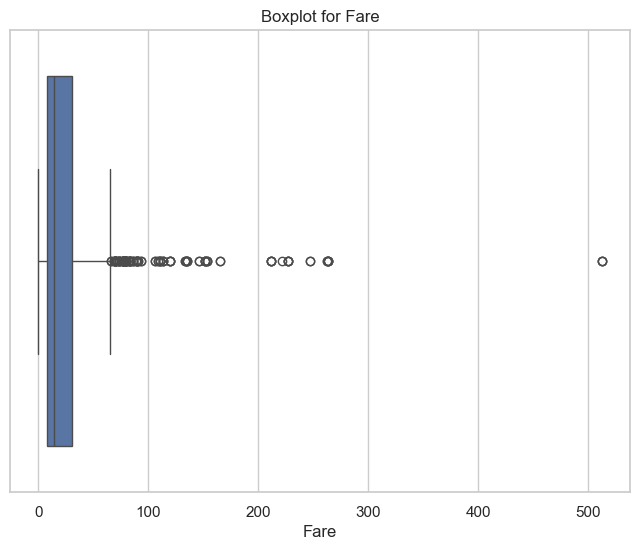

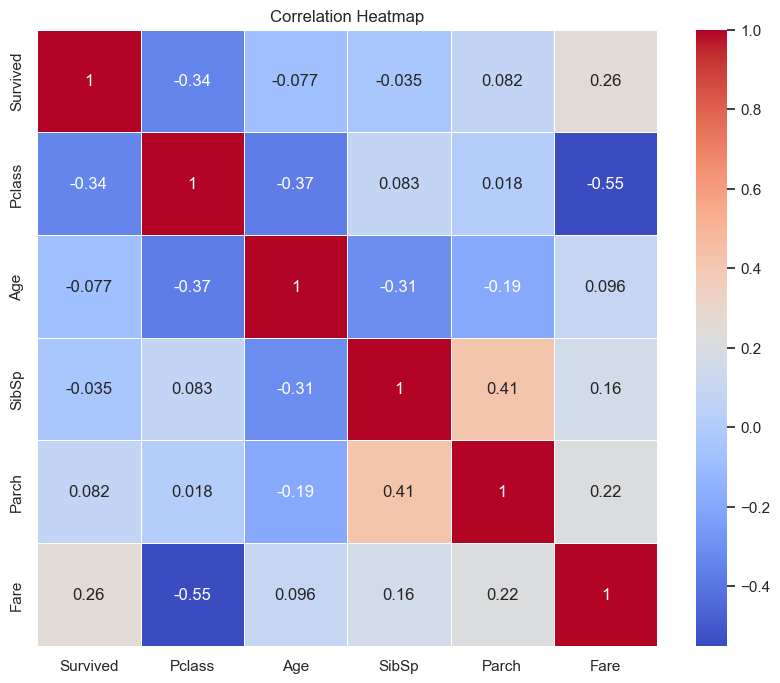

Generating Class Imbalance Plots...


C:\Users\user\AppData\Local\Temp\ipykernel_11944\3710801025.py:58: UserWarning: Glyph 9888 (\N{WARNING SIGN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_11944\3710801025.py:58: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9888 (\N{WARNING SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


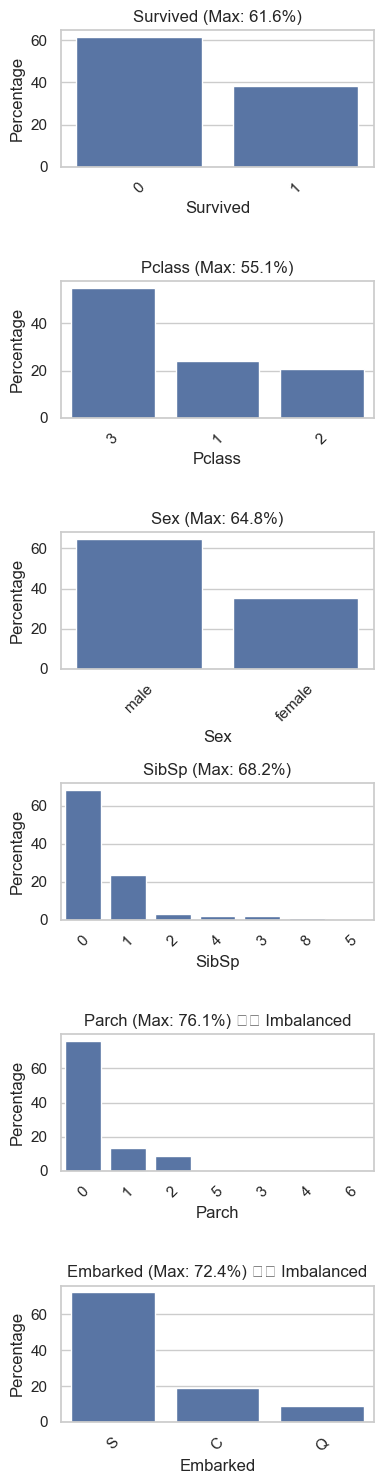

EDA Complete ✅


In [176]:
plot_eda(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
None
Generating Pairplot for numerical variables...


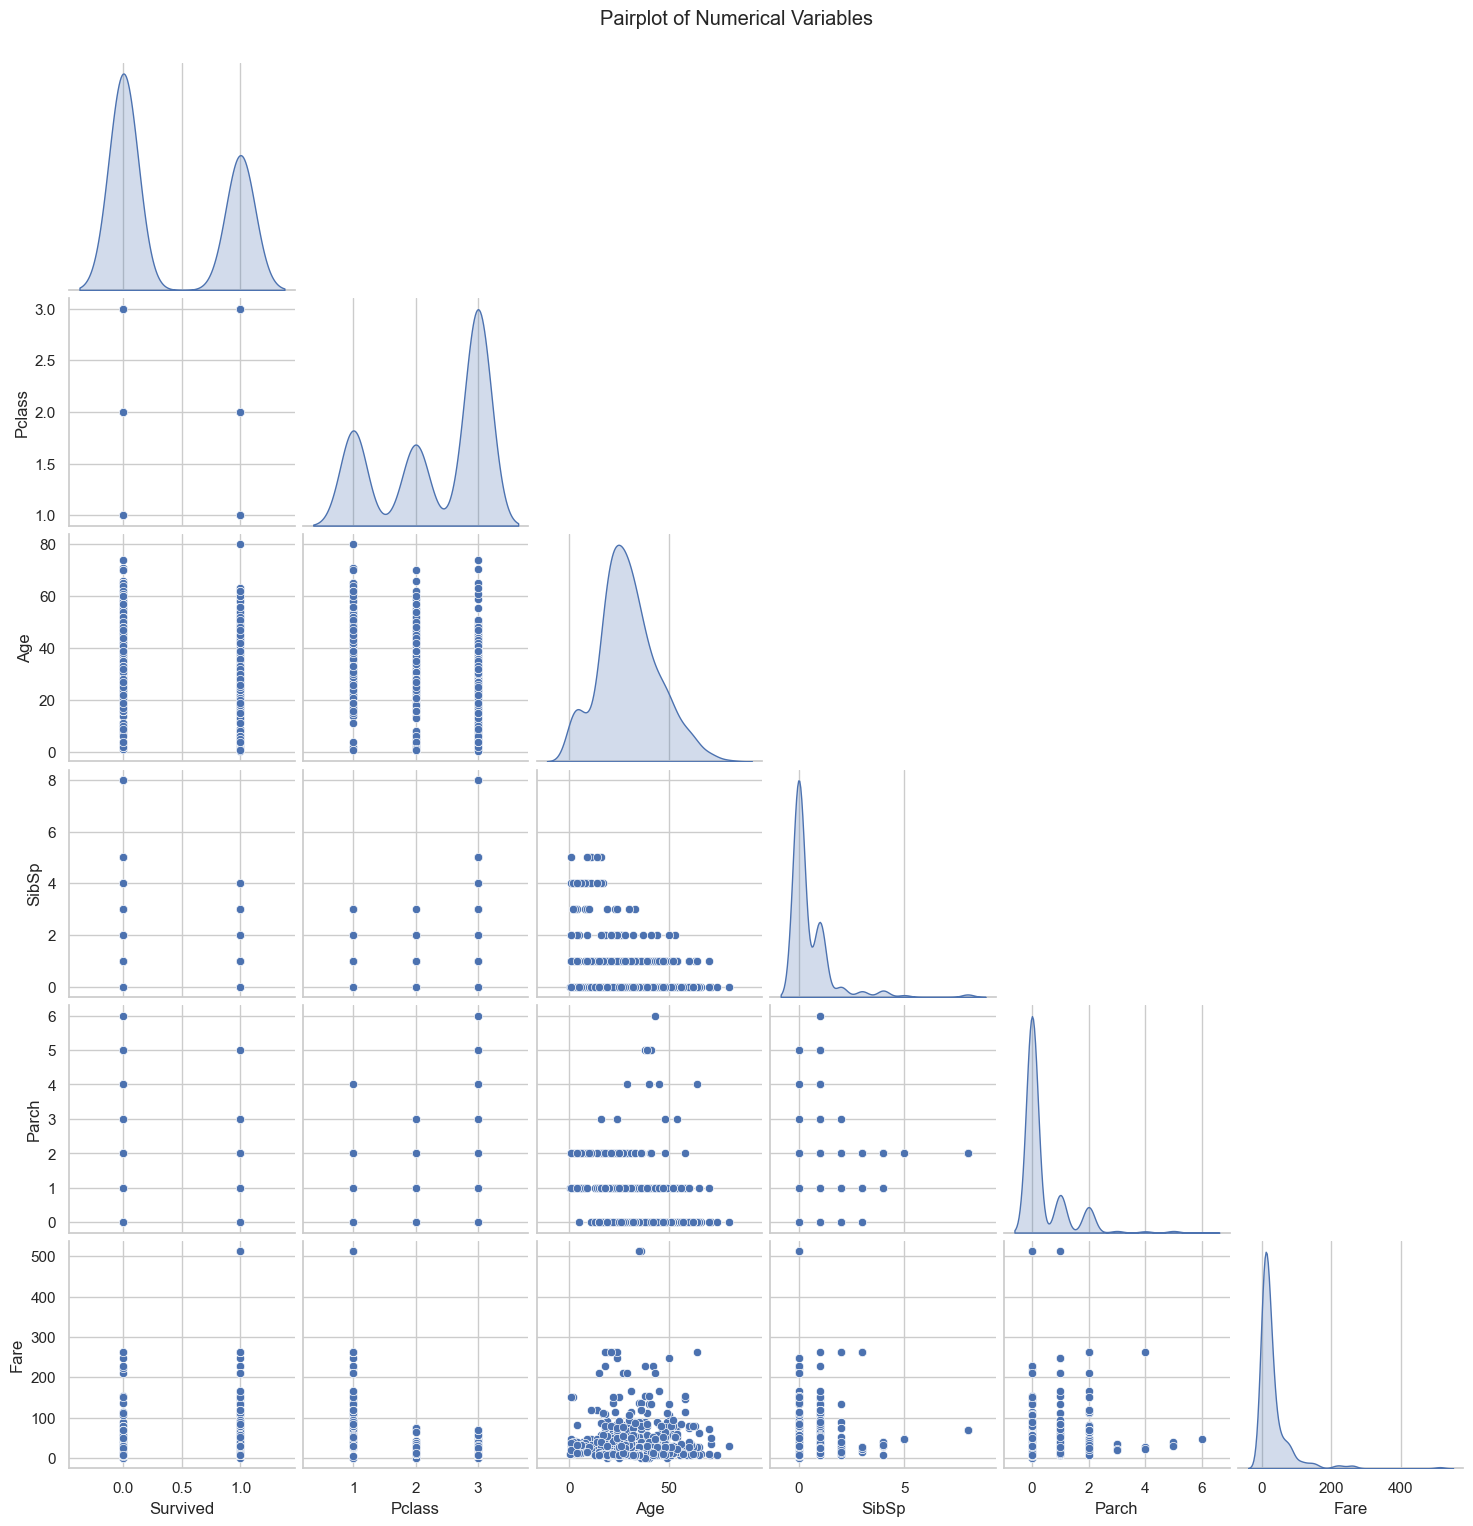

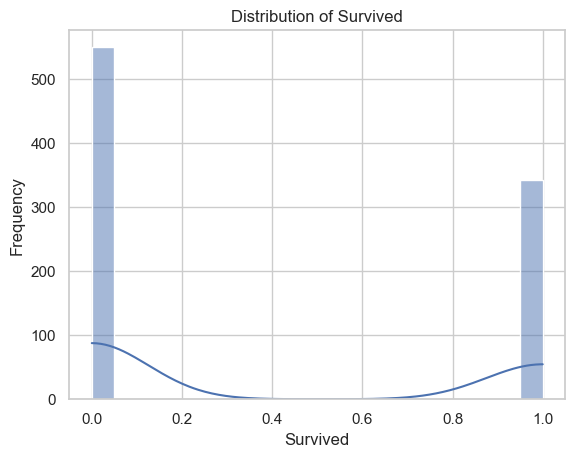

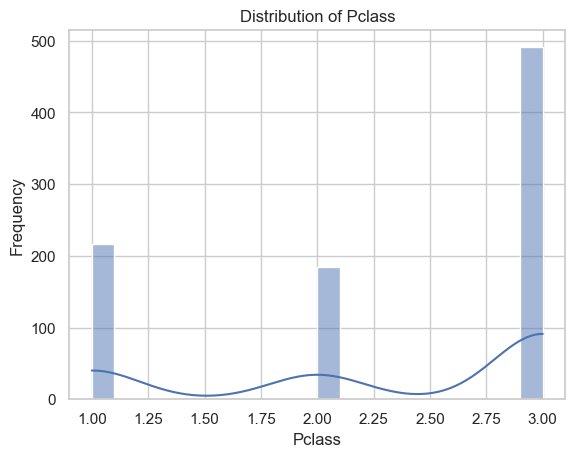

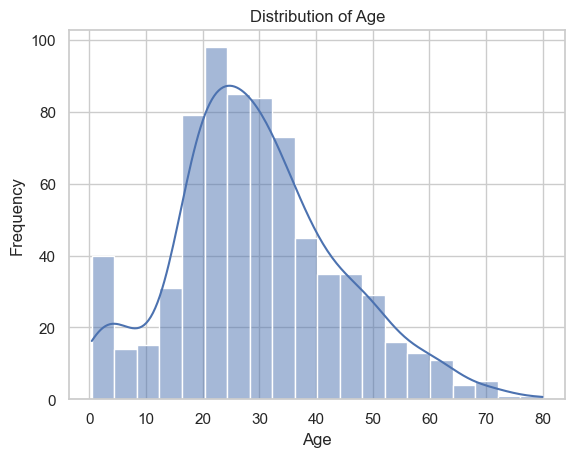

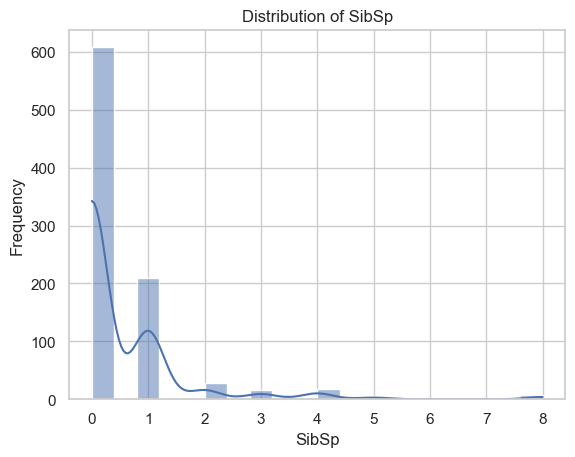

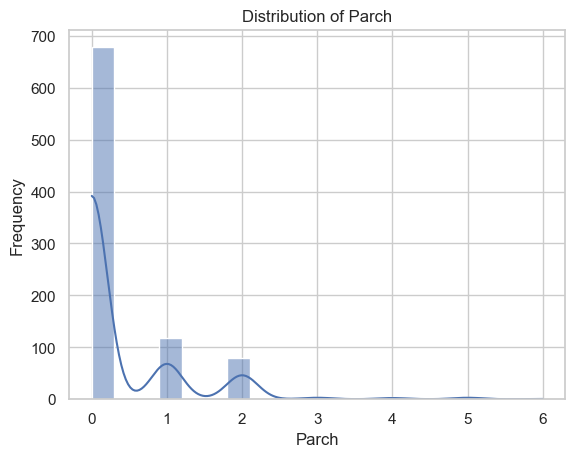

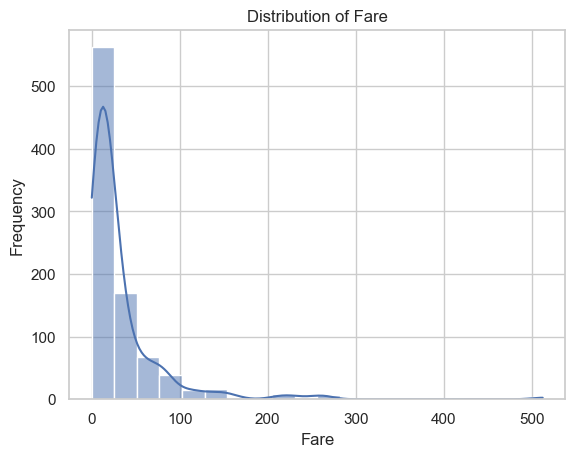

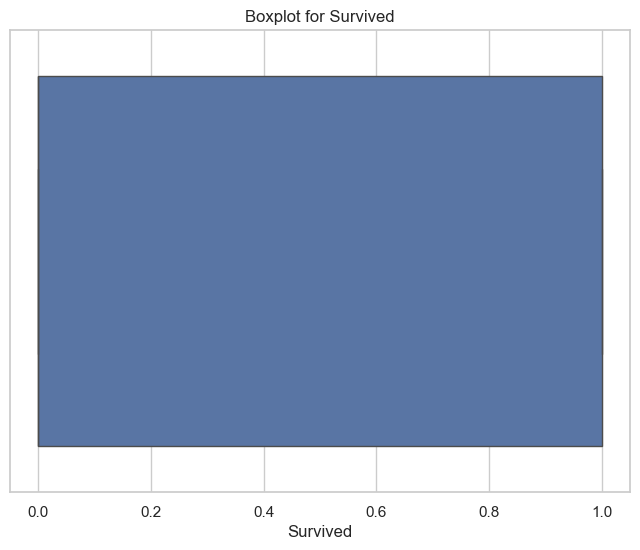

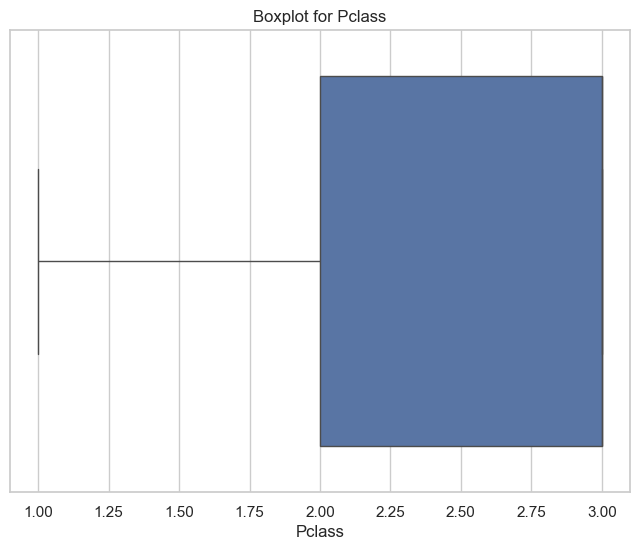

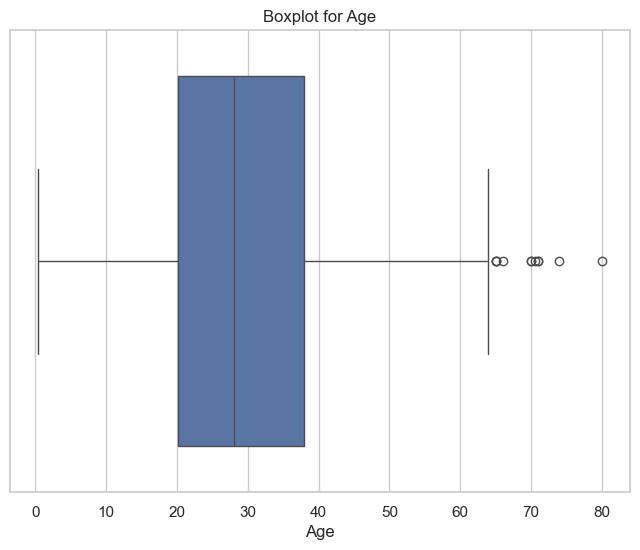

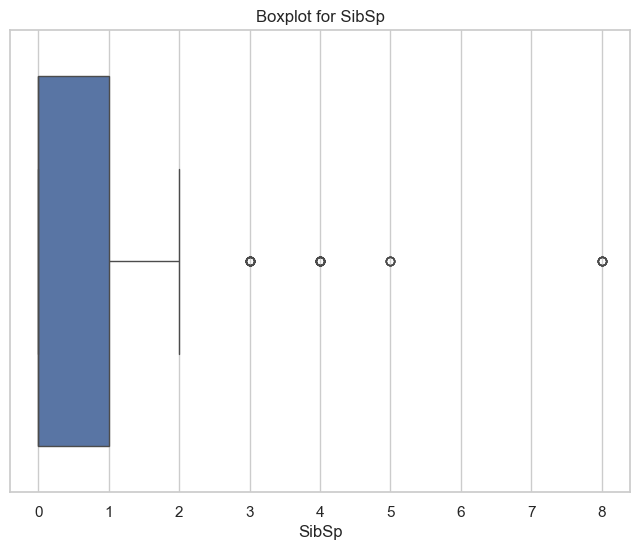

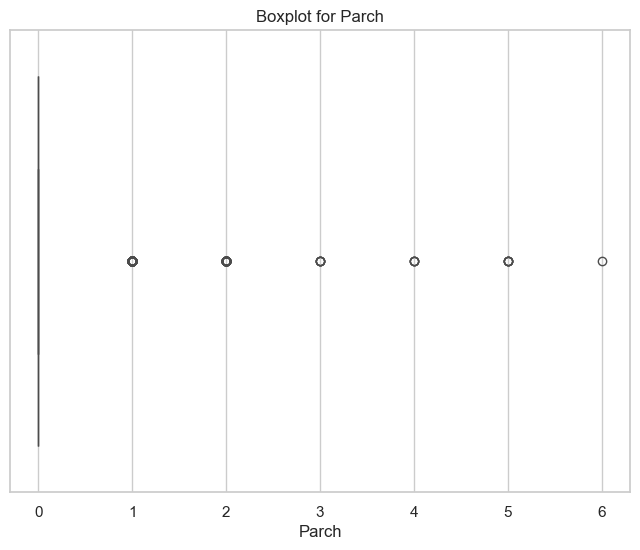

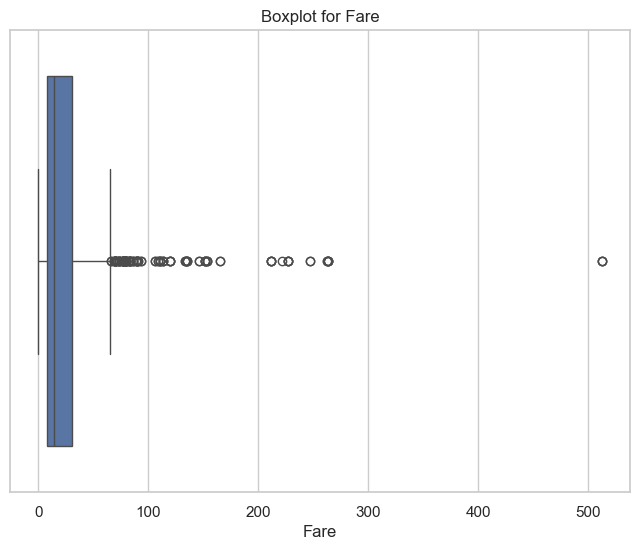

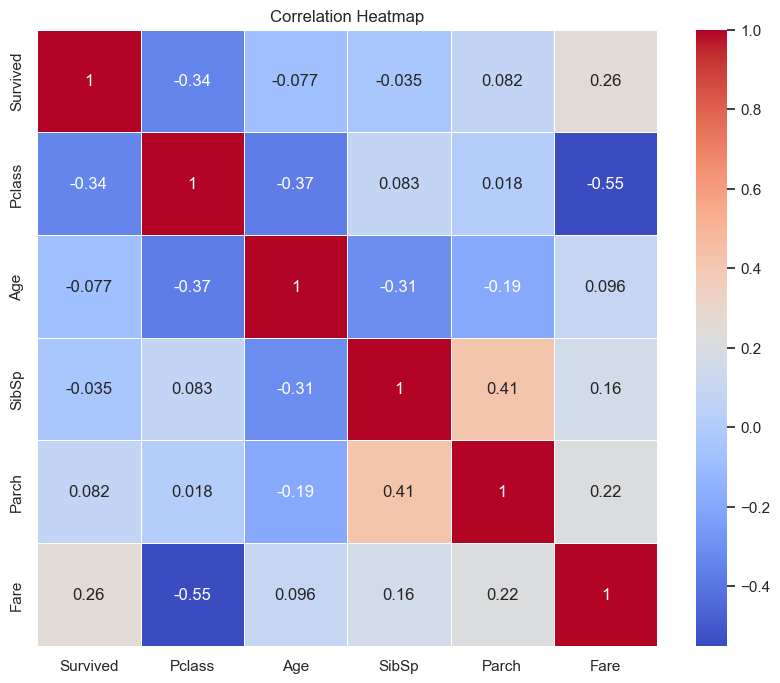

Generating Class Imbalance Plots...


C:\Users\user\AppData\Local\Temp\ipykernel_11944\3710801025.py:58: UserWarning: Glyph 9888 (\N{WARNING SIGN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_11944\3710801025.py:58: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9888 (\N{WARNING SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


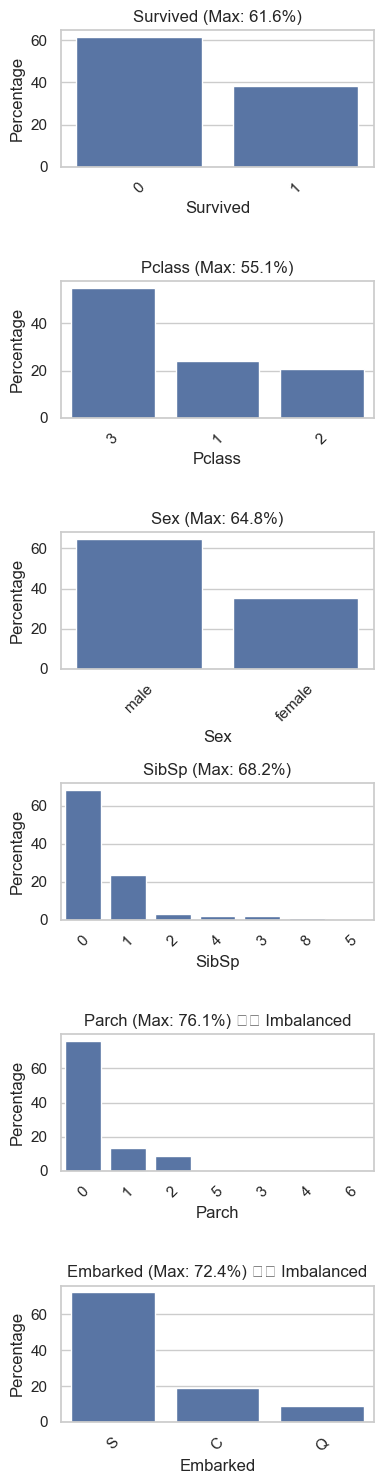

EDA Complete ✅


In [177]:
plot_eda(df)

In [178]:
def wrangle2(
    df,
    skew_threshold=1.0,
    cap_outliers=True
):
    df = df.copy()

    print("🔍 Missing values before:")
    print(df.isna().sum())

    # -----------------------------
    # 1. Missing values
    # -----------------------------
    if 'Age' in df.columns:
        df['Age'] = df['Age'].fillna(df['Age'].median())

    if 'Embarked' in df.columns:
        df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

    # -----------------------------
    # 2. Fix skewness
    # -----------------------------
    num_cols = df.select_dtypes(include=["int64", "float64"]).columns

    for col in num_cols:
        if abs(skew(df[col].dropna())) >= skew_threshold:
            if (df[col] >= 0).all():
                df[col] = np.log1p(df[col])

    # -----------------------------
    # 3. Outlier capping (IQR)
    # -----------------------------
    if cap_outliers:
        for col in num_cols:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1

            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR

            df[col] = df[col].clip(lower, upper)

    print("\n✅ Missing values after:")
    print(df.isna().sum())

    return df


In [179]:
df_clean = wrangle2(df)

🔍 Missing values before:
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

✅ Missing values after:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


**Define Features & Target**

In [180]:
X = df_clean.drop(columns=['Survived'])
y = df_clean['Survived']

# Feature groups
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Sex', 'Embarked']
ordinal_features = ['Pclass']


**Preprocessing Pipelines**

In [181]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

ordinal_transformer = Pipeline(steps=[
    ('passthrough', 'passthrough')
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features)
    ]
)


**Full ML Pipeline**

In [182]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

**Train-Test Split**

In [183]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

**Train Model**

In [184]:
model_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Sex', 'Embarked']),
                                                 ('ord',
                                                  Pipeline(steps=[('passthrough',
                                                                   'passthrough')]),
                                                  ['Pclass'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

**Evaluate Model**

In [185]:
y_pred = model_pipeline.predict(X_test)
y_probs = model_pipeline.predict_proba(X_test)[:, 1]
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7932960893854749

Confusion Matrix:
[[94 16]
 [21 48]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       110
           1       0.75      0.70      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



|                         | Predicted Died (0) | Predicted Survived (1) |
| ----------------------- | ------------------ | ---------------------- |
| **Actual Died (0)**     | 94 ✅               | 16 ❌                   |
| **Actual Survived (1)** | 21 ❌               | 48 ✅                   |

Interpretation:

94 true negatives → correctly predicted deaths

48 true positives → correctly predicted survivors

21 false negatives → ❗ survivors predicted as dead

16 false positives → predicted survived but died

👉 Key insight:
The model is better at predicting deaths than survivors

📊 3. Classification Report (Class-wise performance)

**Class 0 (Did NOT survive)**

Precision = 0.82 → when model predicts death, it’s right 80% of the time

Recall = 0.85 → catches most deaths

F1 = 0.84 → strong performance

**Class 1 (Survived) ⭐**

Precision = 0.75

Recall = 0.70 ❗

F1 = 0.72

📌 Recall = 0.70 means:

The model only identifies 70% of actual survivors

This is the main weakness of the model

⚖️ Macro vs Weighted Averages

Macro avg → treats both classes equally

Weighted avg → influenced by class imbalance

The slight drop in macro recall confirms class imbalance impact.

✅ STEP 1: Class-Weighted Logistic Regression

This directly addresses your model’s weakness (missing survivors).

Why this works

Penalizes false negatives (missed survivors) more

Usually increases recall for class 1

Small trade-off in accuracy (acceptable)

In [186]:
weighted_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, class_weight={0: 1, 1: 2}))
])

weighted_model_pipeline.fit(X_train, y_train)

# Predictions
y_pred_weighted = weighted_model_pipeline.predict(X_test)
y_probs_weighted = weighted_model_pipeline.predict_proba(X_test)[:, 1]

# Evaluation
print("✅ Class-Weighted Logistic Regression\n")
print("Accuracy:", accuracy_score(y_test, y_pred_weighted))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_weighted))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_weighted))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_probs)
print("ROC-AUC:", roc_auc)

✅ Class-Weighted Logistic Regression

Accuracy: 0.7821229050279329

Confusion Matrix:
[[85 25]
 [14 55]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       110
           1       0.69      0.80      0.74        69

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.78       179
weighted avg       0.79      0.78      0.78       179

ROC-AUC: 0.8346508563899869


|                         | Predicted Died (0) | Predicted Survived (1) |
| ----------------------- | ------------------ | ---------------------- |
| **Actual Died (0)**     | 85 ✅               | 25 ❌                   |
| **Actual Survived (1)** | 14 ❌               | 55 ✅                   |

📊 STEP 2: ROC Curve (Very Important)

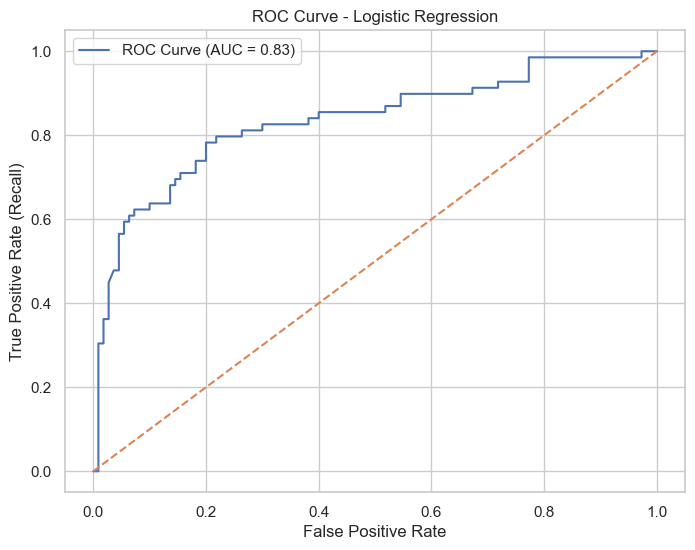

In [187]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()


**KEY NOTE**
“I introduced class weights to reduce false negatives for the minority class. 
This improved recall for survivors while maintaining reasonable overall accuracy.”

🔥 STEP 3 (Optional but Powerful): Threshold Tuning

Default threshold = 0.5
Let’s improve recall further 👇

In [188]:
custom_threshold = 0.4
y_pred_custom = (y_probs >= custom_threshold).astype(int)

print("Confusion Matrix (Threshold = 0.4)")
print(confusion_matrix(y_test, y_pred_custom))
print("\nClassification Report")
print(classification_report(y_test, y_pred_custom))


Confusion Matrix (Threshold = 0.4)
[[87 23]
 [15 54]]

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       110
           1       0.70      0.78      0.74        69

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.79      0.79      0.79       179



**✅⃣  Random Forest Model (Stronger Non-Linear Baseline)**
Why Random Forest?

Captures non-linear patterns

Handles interactions automatically

**Feature Importance (Explainability)**

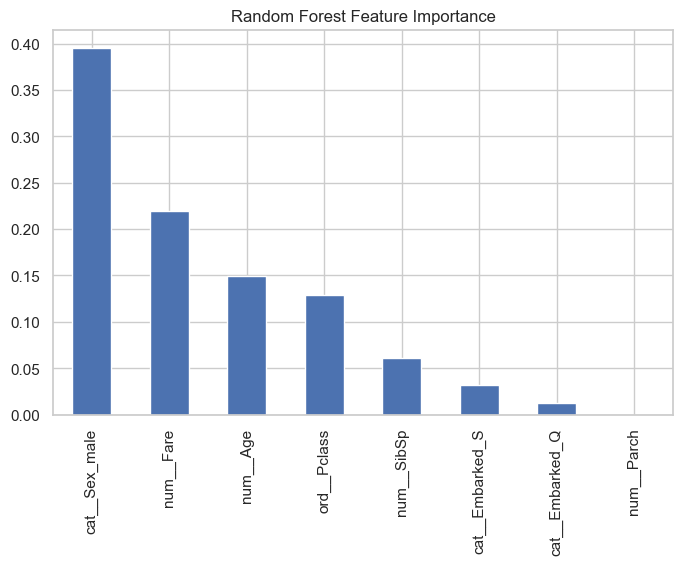

In [189]:
prep = rf_model_pipeline.named_steps["preprocess"]
rf_model = rf_model_pipeline.named_steps["classifier"]

feature_names = prep.get_feature_names_out()

importances = pd.Series(
    rf_model.feature_importances_,
    index=feature_names
).sort_values(ascending=False)

plt.figure(figsize=(8,5))
importances.plot(kind="bar")
plt.title("Random Forest Feature Importance")
plt.show()

📌 Typical Titanic insight:

Sex → strongest predictor

Fare, Age, Pclass, → very important

Family size features often help

In [190]:
rf_model_pipeline = Pipeline(steps=[
        ("preprocess", preprocessor),
        ("classifier", RandomForestClassifier(
            n_estimators=300,
            max_depth=6,
            class_weight="balanced",
            random_state=42
        ))
    ]
)

rf_model_pipeline.fit(X_train, y_train)

y_pred_rf = rf_model_pipeline.predict(X_test)
y_probs_rf = rf_model_pipeline.predict_proba(X_test)[:, 1]

print("🌲 Random Forest Evaluation\n")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_probs_rf))


🌲 Random Forest Evaluation

Accuracy: 0.7932960893854749

Confusion Matrix:
[[92 18]
 [19 50]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       110
           1       0.74      0.72      0.73        69

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

ROC-AUC: 0.8434782608695652


🎯 Hyperparameter Tuning with GridSearchCV (Random Forest)

This is exactly what comes after building a solid baseline.

In [191]:
param_grid = {
    "classifier__n_estimators": [200, 300, 500],
    "classifier__max_depth": [None, 5, 10],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 2, 4]
}


rf_model_tuned = Pipeline(steps=[
        ("preprocess", preprocessor),
        ("classifier", RandomForestClassifier(
            #n_estimators=300,no longer necessary
            #max_depth=6,
            class_weight="balanced",
            random_state=42
        ))
    ]
)

grid_search = GridSearchCV(
    estimator=rf_model_tuned,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:")
print(grid_search.best_params_)

best_rf = grid_search.best_estimator_

y_pred_best = best_rf.predict(X_test)
y_probs_best = best_rf.predict_proba(X_test)[:, 1]

print("🌟 Tuned Random Forest Evaluation\n")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))
print("ROC-AUC:", roc_auc_score(y_test, y_probs_best))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters:
{'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}
🌟 Tuned Random Forest Evaluation

Accuracy: 0.7821229050279329

Confusion Matrix:
[[92 18]
 [21 48]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       110
           1       0.73      0.70      0.71        69

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

ROC-AUC: 0.8314888010540185


**Model Comparison Table**

In [192]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

results = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Weighted Logistic",
        "Random Forest",
        "Random Forest Tuned"
    ],
    "Accuracy": [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_weighted),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_best)
    ],
    "Recall (Survived)": [
        classification_report(y_test, y_pred, output_dict=True)["1"]["recall"],
        classification_report(y_test, y_pred_weighted, output_dict=True)["1"]["recall"],
        classification_report(y_test, y_pred_rf, output_dict=True)["1"]["recall"],
        classification_report(y_test, y_pred_best, output_dict=True)["1"]["recall"]
    ],
    "ROC-AUC": [
        roc_auc_score(y_test, y_probs),
        roc_auc_score(y_test, y_probs_weighted),
        roc_auc_score(y_test, y_probs_rf),
        roc_auc_score(y_test, y_probs_best)
    ]
})

results


,Model,Accuracy,Recall (Survived),ROC-AUC
0,Logistic Regression,0.793296,0.695652,0.834651
1,Weighted Logistic,0.782123,0.797101,0.833202
2,Random Forest,0.793296,0.724638,0.843478
3,Random Forest Tuned,0.782123,0.695652,0.831489


**Saving the best performing model**

In [196]:
import joblib

joblib.dump(weighted_model_pipeline, "models/titanic_model.pkl")

['C:/Users/user/Documents/Tech/TS_ACADEMY/models/titanic_model.pkl']